## EDA and Classify using Embeddings

We want to evaluate embedding quality by seeing how well they can be used to classify the data. We will use the embeddings to train a classifier and see how well it performs.

In [1]:
import pandas as pd
import numpy as np
from utils import drug_data_tools

In [2]:
drug_classes = pd.read_csv("outputs/drug-classes.csv", index_col=0)#, index_col="Drug Name")
drug_classes

,Drug Class
Drug Name,
ella,Progesterone receptor modulators
pancreatin,Digestive enzymes
boroleum,Topical rubefacient
benicar,Angiotensin receptor blockers
duac,Topical acne agents
...,...
acne-10-gel-topical,Topical acne agents
lorbrena,Multikinase inhibitors
halcion,Benzodiazepines


In [3]:
selected_molecules = drug_data_tools.get_selected_molecules(filter_molecules=False)
len(selected_molecules)

5747

In [4]:
# Drugs that are both in Drugs.com (i.e. we have class information for) and Selected Molecules
len(set(drug_classes.index).intersection(selected_molecules))

629

In [5]:
# Select them out
selected_drugs_com_molecules = drug_classes[drug_classes.index.isin(set(drug_classes.index).intersection(selected_molecules))]
# intersecting_drugs

In [6]:
selected_drugs_com_molecules['Drug Class'].value_counts()

Drug Class
Multikinase inhibitors                      23
Nonsteroidal anti-inflammatory drugs        11
Angiotensin Converting Enzyme Inhibitors    11
Miscellaneous antineoplastics               11
Opioids (narcotic analgesics)               11
                                            ..
Estrogens                                    1
Methylxanthines                              1
Sterile irrigating solutions                 1
Diarylquinolines                             1
First generation cephalosporins              1
Name: count, Length: 220, dtype: int64

Filter out classes with less than 3 drugs in them

In [7]:
class_counts = selected_drugs_com_molecules["Drug Class"].value_counts()
selected_drugs_com_molecules = selected_drugs_com_molecules[~selected_drugs_com_molecules['Drug Class'].isin(class_counts[class_counts < 3].index)]

selected_drugs_com_molecules

,Drug Class
Drug Name,
paliperidone,Atypical antipsychotics
carboplatin,Alkylating agents
apraclonidine,Ophthalmic glaucoma agents
naproxen,Nonsteroidal anti-inflammatory drugs
fesoterodine,Urinary antispasmodics
...,...
ixazomib,Proteasome inhibitors
terbinafine,Miscellaneous antifungals
azithromycin,Macrolides


In [8]:
# Nr unique drug classes after filtering
len(set(selected_drugs_com_molecules['Drug Class']))

89

Load Llama embeddings of Selected Molecules. select out only intersecting ones

In [9]:
# You may need to unzip this file
df_embeddings = pd.read_csv("outputs/llama-embeddings.csv", index_col=0)

/var/folders/21/rybqmdj15yz5lp1lppq1761m0000gn/T/ipykernel_7768/4083599653.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_embeddings = pd.read_csv("outputs/llama-embeddings.csv", index_col=0)


In [10]:
# TODO Why are some drugs missing? 115 vs 103
intersecting_drugs_w_embd_df = df_embeddings.loc[df_embeddings.index.intersection(set(selected_drugs_com_molecules.index))]
intersecting_drugs_w_embd_df

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
Drug Name,,,,,,,,,,,,,,,,,,,,,
metoprolol,1.335753,2.161436,1.496096,-3.932546,-1.592998,2.195589,-0.414019,-2.165927,-1.870294,-1.154526,...,0.855179,2.305032,-0.588465,-0.861581,-0.986699,-0.788470,-0.416676,-0.703455,-0.811596,0.232640
metoprolol,1.335753,2.161436,1.496096,-3.932546,-1.592998,2.195589,-0.414019,-2.165927,-1.870294,-1.154526,...,0.855179,2.305032,-0.588465,-0.861581,-0.986699,-0.788470,-0.416676,-0.703455,-0.811596,0.232640
azithromycin,2.171341,-1.940131,0.527677,-2.674657,0.481412,0.659501,-0.700396,-2.464024,-0.526592,-1.185496,...,1.643646,0.069546,-0.523973,0.677047,-1.509195,-1.038637,0.281480,-1.862429,-0.855788,-0.878044
azithromycin,2.171341,-1.940131,0.527677,-2.674657,0.481412,0.659501,-0.700396,-2.464024,-0.526592,-1.185496,...,1.643646,0.069546,-0.523973,0.677047,-1.509195,-1.038637,0.281480,-1.862429,-0.855788,-0.878044
azithromycin,2.171341,-1.940131,0.527677,-2.674657,0.481412,0.659501,-0.700396,-2.464024,-0.526592,-1.185496,...,1.643646,0.069546,-0.523973,0.677047,-1.509195,-1.038637,0.281480,-1.862429,-0.855788,-0.878044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
safinamide,1.831138,-0.722979,-0.169600,-0.663844,2.255189,-0.097919,-1.826207,-1.011427,-0.925030,-1.235262,...,1.077839,0.469794,1.428747,1.228721,-2.006808,1.292200,-0.869077,-0.365371,-0.716432,1.018778
tetracaine,2.375805,-0.550600,-0.317740,-6.162849,0.387715,3.484651,-1.250204,0.708129,-1.568058,-0.188319,...,-0.333267,0.468915,1.039704,0.833126,-0.110758,-1.555666,2.269895,-0.707022,-0.132469,1.434584
molnupiravir,1.256034,-0.558306,-1.054755,-3.506884,1.212670,0.094697,-1.026823,-1.248714,0.068658,0.028063,...,0.367541,2.116549,2.578151,0.909213,0.276340,0.581648,-0.306725,-0.968040,-1.864877,-0.921632


Apply dimensionality reduction to embeddings to plot them

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)

t_sneezed_data = tsne.fit_transform(intersecting_drugs_w_embd_df)

print(type(t_sneezed_data))
print(t_sneezed_data.shape)

<class 'numpy.ndarray'>
(910, 2)


In [13]:
def add_class_and_names(dim_red_numpy_arr):
    """
        Sklearn's dimensionality reduction methods return numpy arrays. Add the drug class and drug name to the numpy array.
    """
    dim_red_numpy_arr = pd.DataFrame(dim_red_numpy_arr, index=intersecting_drugs_w_embd_df.index)
    dim_red_numpy_arr = pd.concat([pd.DataFrame(dim_red_numpy_arr, index=intersecting_drugs_w_embd_df.index), selected_drugs_com_molecules.loc[intersecting_drugs_w_embd_df.index]['Drug Class']], axis=1)

    dim_red_numpy_arr['Drug Class'] = pd.Series(dim_red_numpy_arr['Drug Class'], dtype="category")

    return dim_red_numpy_arr

In [14]:
t_sneezed_data_classes = add_class_and_names(t_sneezed_data)
t_sneezed_data_classes.head()

,0,1,Drug Class
Drug Name,,,
metoprolol,59.522381,90.746307,Cardioselective beta blockers
metoprolol,59.522381,90.746307,Cardioselective beta blockers
azithromycin,-55.970699,22.158138,Macrolides
azithromycin,-55.970699,22.158138,Macrolides
azithromycin,-52.881695,19.825333,Macrolides


In [15]:
t_sneezed_data_classes.head()

,0,1,Drug Class
Drug Name,,,
metoprolol,59.522381,90.746307,Cardioselective beta blockers
metoprolol,59.522381,90.746307,Cardioselective beta blockers
azithromycin,-55.970699,22.158138,Macrolides
azithromycin,-55.970699,22.158138,Macrolides
azithromycin,-52.881695,19.825333,Macrolides


In [16]:
t_sneezed_data_classes.dtypes

0              float32
1              float32
Drug Class    category
dtype: object

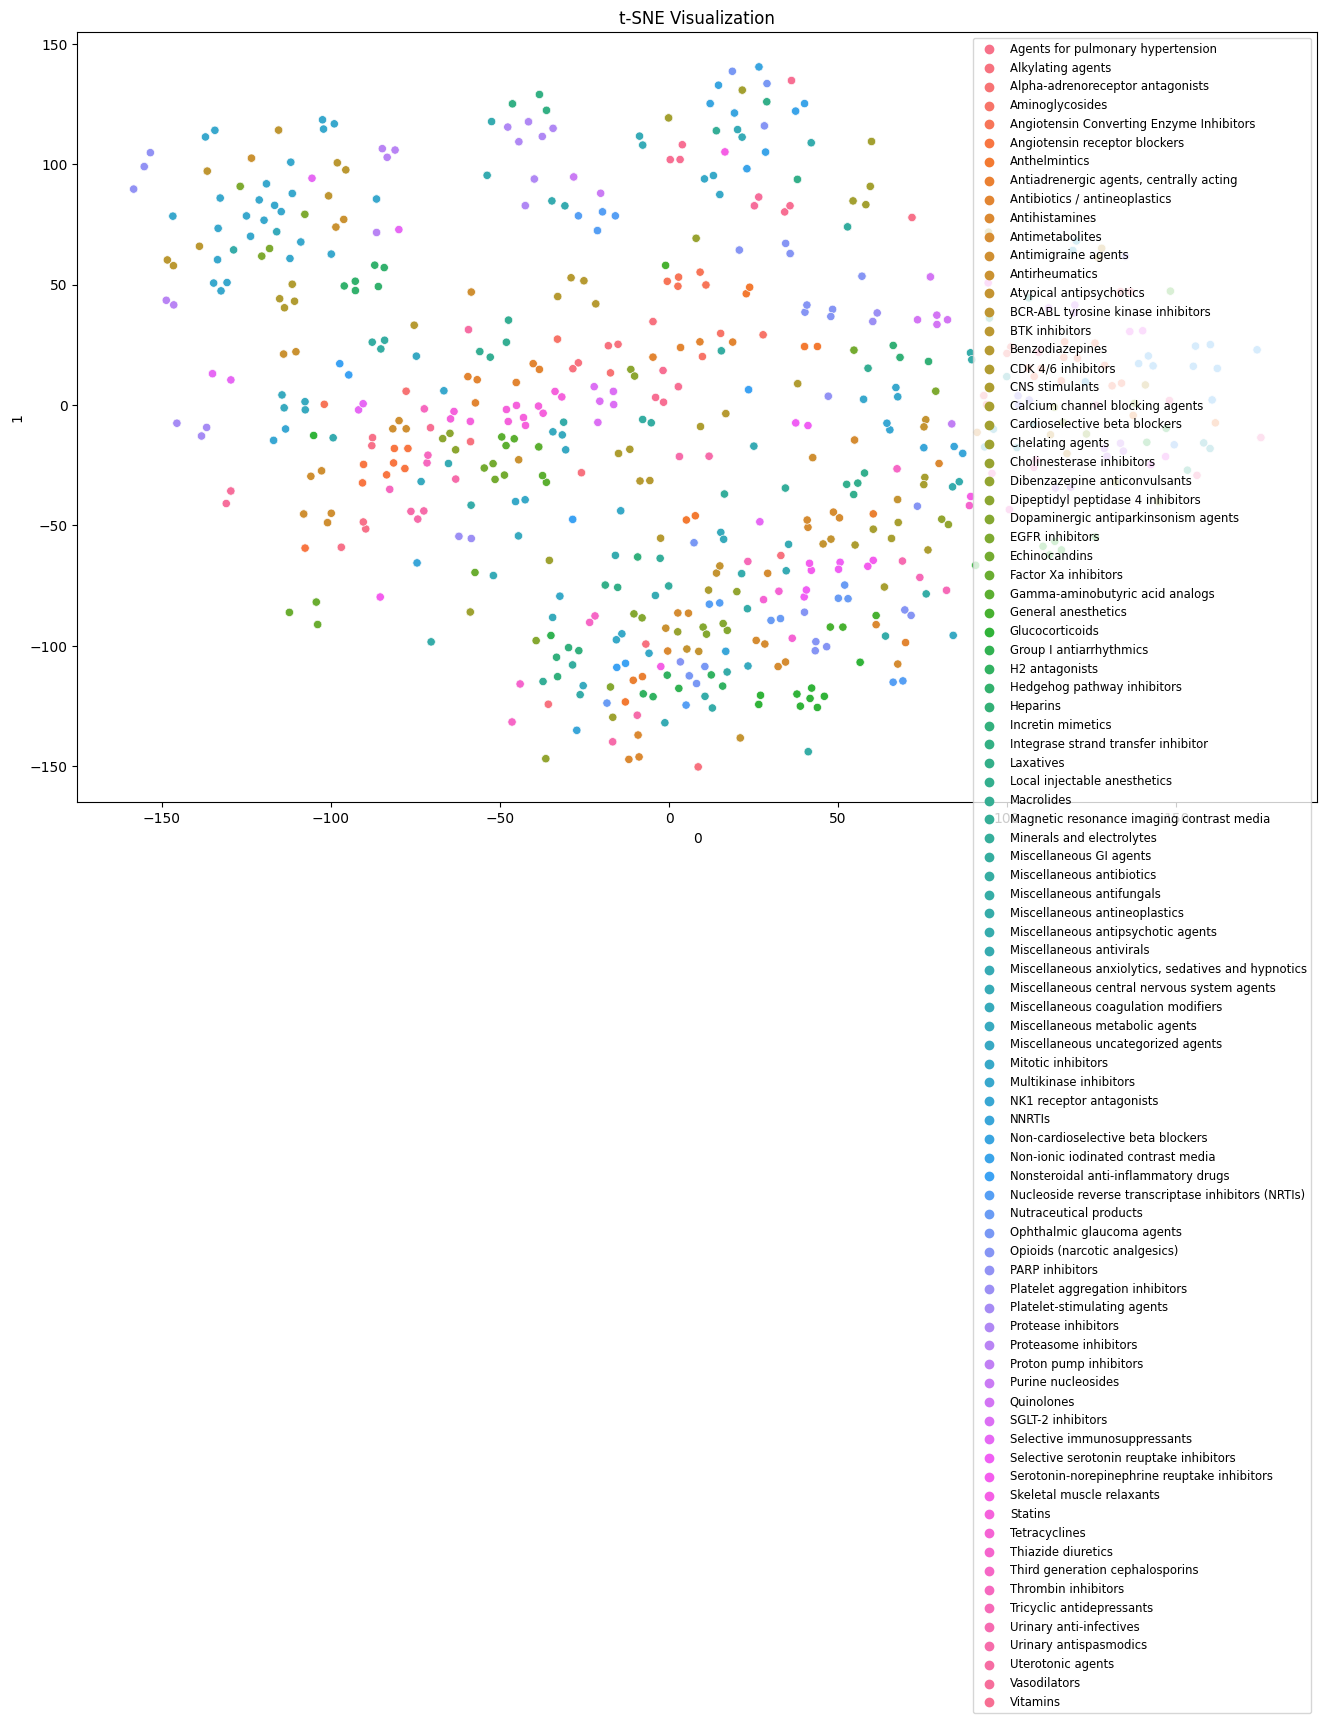

In [17]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=t_sneezed_data_classes.reset_index(drop=True), x=0, y=1, hue='Drug Class')


plt.title('t-SNE Visualization')
plt.legend(fontsize='small')
plt.show()

## Let's try 3D

In [18]:
tsne = TSNE(n_components=3, random_state=0)

t_sneezed_data = tsne.fit_transform(intersecting_drugs_w_embd_df)

print(type(t_sneezed_data))
print(t_sneezed_data.shape)

<class 'numpy.ndarray'>
(910, 3)


In [19]:
t_sneezed_data_classes = add_class_and_names(t_sneezed_data)

In [20]:
t_sneezed_data_classes.dtypes

0              float32
1              float32
2              float32
Drug Class    category
dtype: object

In [21]:
#change to widget for interactive
%matplotlib inline

In [22]:
def plot_interactive_3d(df_orig):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    df = df_orig.copy()

    cmap = plt.get_cmap("viridis")
    colors = cmap(np.linspace(0, 1, len(df["Drug Class"].cat.categories)))

    color_dict = dict(zip(df["Drug Class"].cat.categories, colors))

    df["Color"] = df["Drug Class"].cat.codes
    cmap = plt.cm.get_cmap("plasma", len(df["Drug Class"].cat.categories))

    # Add a 3D subplot
    ax = fig.add_subplot(111, projection='3d')

    # Plot a 3D scatter plot
    sc = ax.scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], c=df["Color"], cmap=cmap)


    plt.show()

/var/folders/21/rybqmdj15yz5lp1lppq1761m0000gn/T/ipykernel_7768/3050845372.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("plasma", len(df["Drug Class"].cat.categories))


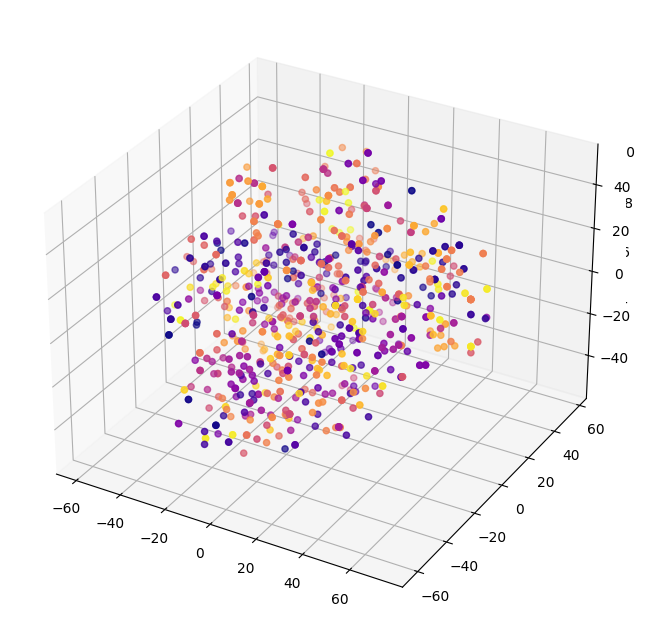

In [23]:
plot_interactive_3d(t_sneezed_data_classes)

## Let's perform Linear Discriminant Analysis to reduce the dimensionality of the embeddings, with the aim of classifying the drugs

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [25]:
lda = LDA(n_components=3)

lda_3d = lda.fit_transform(intersecting_drugs_w_embd_df, selected_drugs_com_molecules.loc[intersecting_drugs_w_embd_df.index]['Drug Class'])
lda_3d.shape

(910, 3)

In [26]:
lda_3d = add_class_and_names(lda_3d)

/var/folders/21/rybqmdj15yz5lp1lppq1761m0000gn/T/ipykernel_7768/3050845372.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("plasma", len(df["Drug Class"].cat.categories))


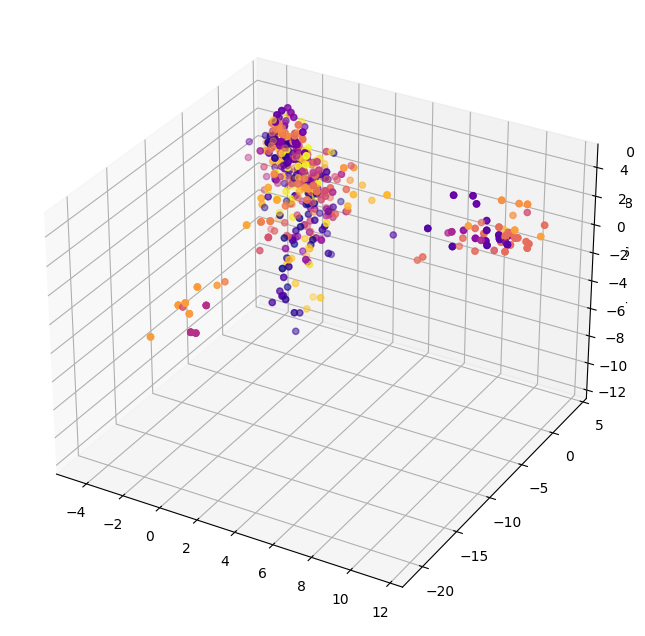

In [27]:
plot_interactive_3d(lda_3d)

## Let's classify using various methods to see performance

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [29]:
k = 5  # Number of folds

In [30]:
data = intersecting_drugs_w_embd_df
data['Drug Class'] = selected_drugs_com_molecules.loc[intersecting_drugs_w_embd_df.index]['Drug Class']
data.shape

(910, 4097)

In [31]:
%matplotlib inline

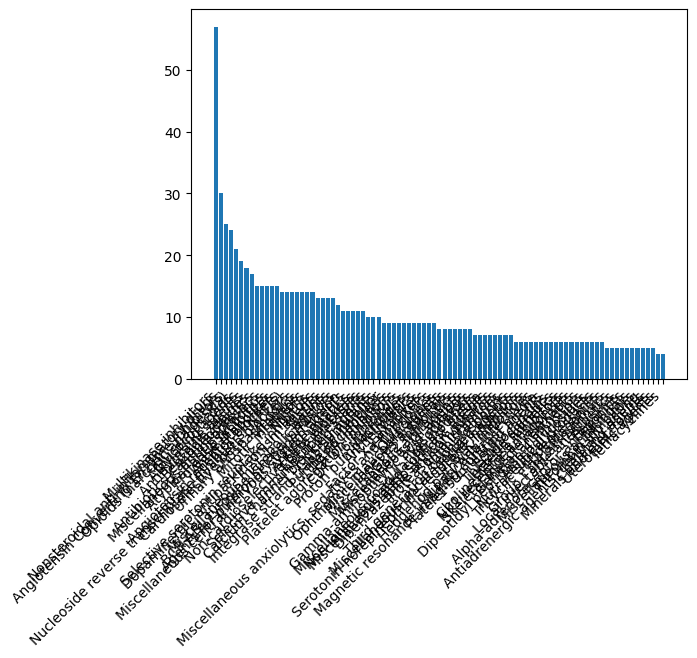

In [32]:
# Histogram of classes
plt.figure()

class_counts = data["Drug Class"].value_counts()
plt.bar(class_counts.index, class_counts.values)

# Rotate x-axis labels diagonally
plt.xticks(rotation=45, ha='right')

plt.show()


In [33]:
def run_cross_val(model, data):
    scores = cross_val_score(model, data.drop("Drug Class", axis=1), data['Drug Class'], cv=k)

    print("Cross-validation scores:", scores)

    mean_accuracy = np.mean(scores)
    print("Mean accuracy:", mean_accuracy)

No projection + Logistic Regression

In [34]:
run_cross_val(LogisticRegression(max_iter=1000), data)

/Users/ariellubonja/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/ariellubonja/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross-validation scores: [0.80769231 0.85714286 0.86263736 0.73626374 0.49450549]
Mean accuracy: 0.7516483516483516


LDA - 3 components

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [36]:
a = LDA(n_components=3).fit_transform(data.drop("Drug Class", axis=1), data['Drug Class'])

run_cross_val(LDA(n_components=3), add_class_and_names(a))

Cross-validation scores: [0.32417582 0.35714286 0.41208791 0.32967033 0.31868132]
Mean accuracy: 0.34835164835164834


/Users/ariellubonja/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


LDA can not have more components than n_classes

In [37]:
a = LDA(n_components=15).fit_transform(data.drop("Drug Class", axis=1), data['Drug Class'])

run_cross_val(LDA(n_components=15), add_class_and_names(a))

Cross-validation scores: [0.90659341 0.92857143 0.89010989 0.78571429 0.60989011]
Mean accuracy: 0.8241758241758241


/Users/ariellubonja/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


<font color="orange">Interesting, by default LDA chooses fewer components than above?</font>

In [38]:
a = LDA().fit_transform(data.drop("Drug Class", axis=1), data['Drug Class'])

run_cross_val(LDA(), add_class_and_names(a))

/Users/ariellubonja/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.85714286 0.87912088 0.84065934 0.78571429 0.56043956]
Mean accuracy: 0.7846153846153847


TSNE (3 components) + Logistic Regression

In [39]:
from sklearn.manifold import TSNE

In [40]:
tsne = TSNE(n_components=3, random_state=0)
t_sneezed_data = tsne.fit_transform(data.drop("Drug Class", axis=1))

run_cross_val(LogisticRegression(max_iter=15000), add_class_and_names(t_sneezed_data))

/Users/ariellubonja/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.13736264 0.17032967 0.23626374 0.21428571 0.17032967]
Mean accuracy: 0.18571428571428572


<font color="orange">TSNE(n_components=3) seems horrible, try PCA</font>

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=3)
pcad_data = pca.fit_transform(data.drop("Drug Class", axis=1))

run_cross_val(LogisticRegression(max_iter=15000), add_class_and_names(pcad_data))

/Users/ariellubonja/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.18131868 0.2032967  0.20879121 0.19230769 0.15934066]
Mean accuracy: 0.189010989010989


# We don't know based on which metric the embeddings are created

Is it similarity in target disease? Molecule similarity? Use in same sentences etc